In [33]:
import pandas as pd
import os
import sys
from datetime import datetime
import re

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

import numpy as np
import pandas as pd
#import patsy

#sklearn 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#to work on the X
#StandardScaler => standardize data (for categorical data)
#OneHotEncoder => creates dummies using categorical variables
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
#train_test_split => 
#KFold => more complex way to split training and test set: fit the model five times and then average the data
#gridsearch cross validation: to search a set of hyperparameters (the model will use some hyperparameters=> alpha on the regularisation part for example=> search through different para and get the best one)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
#import regression logistic and the one with some crossvalidation in it (LogisticRegressionCV)
from sklearn.pipeline import Pipeline
#like a box => quite graphical 
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
#metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [2]:
df=pd.read_csv('films2021_2022_clean.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,nomi,awards
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,bad,NaN,...,Anglais,0.0,0.0,0.0,87,5,mai,2023,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,soso,Robert Horn,...,Anglais,1.0,0.0,0.0,94,12,août,2022,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",good,Philippe Lioret,...,Français,4.0,0.0,0.0,94,4,janvier,2023,1,0
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,soso,Julia Yorks,...,Anglais,0.0,0.0,0.0,100,15,juillet,2022,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,bad,Tomasz Mandes,...,Anglais,0.0,0.0,0.0,106,27,avril,2022,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,soso,Iván Ledesma,...,Espagnol,0.0,0.0,0.0,111,4,juin,2021,0,0
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,soso,Vicente Amorim,...,Anglais,1.0,0.0,1.0,111,15,janvier,2022,0,0
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,good,Graziano Diana,...,Italien,2.0,0.0,0.0,94,5,novembre,2021,0,0
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,soso,Justin Malen,...,Anglais,10.0,1.0,2.0,86,12,mars,2021,0,0


In [3]:
df.note_spectators= df.note_spectators.replace({"catastrophic":0,"bad":0,"soso":0,"good":1,"excellent":1})

In [65]:
df.note_spectators.value_counts(normalize=True)

0    0.608356
1    0.391644
Name: note_spectators, dtype: float64

In [4]:
y=df['note_spectators'] #default y
X=df.drop(columns='note_spectators') #reste des données

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#it will be set to 0.25.for the test size and 75% for train if no value specified

In [7]:
print("--- Total ---")
print(y.value_counts(normalize=True))
#normalize = True => en %
print("--- Train ---")
print(y_train.value_counts(normalize=True))
print("--- Test ---")
print(y_test.value_counts(normalize=True))

--- Total ---
0    0.608356
1    0.391644
Name: note_spectators, dtype: float64
--- Train ---
0    0.605021
1    0.394979
Name: note_spectators, dtype: float64
--- Test ---
0    0.618349
1    0.381651
Name: note_spectators, dtype: float64


In [8]:
#We have different types of variables
#I list variables in function of what they correspond to
film = ["Titre", "genre1",'genre2','note_presse', "nationality_1","language","length_corrected","day","month","nomi","year"]

In [9]:
#Related to actors
actors = [
    "actor_1",
    "actor 2",
    'actor 3',
    "first actor awards",
    "Second actor awards",
]
#Related to director and writer
director = [
    "réalisateur_1",
    'real awards',
    'distributor',
    'Scenar',
]

In [10]:
M2= film+actors+director

In [11]:
X_train_M2=X_train[M2]
X_test_M2 =X_test[M2]

In [12]:
#2 dictionaries to keep the performancies
test_accuracy={}
test_auc_roc={}

In [36]:
dectree = tree.DecisionTreeClassifier(
    
    random_state=42,
)
#I precise lots of the hyperparameters

In [37]:
from sklearn.compose import make_column_selector as selector
#how I will handle the categorical and numerical vraiables
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train_M2)
categorical_columns

['Titre',
 'genre1',
 'genre2',
 'note_presse',
 'nationality_1',
 'language',
 'month',
 'actor_1',
 'actor 2',
 'actor 3',
 'réalisateur_1',
 'distributor',
 'Scenar']

In [38]:
categorical_transformer= Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]

)

In [39]:
numeric_columns = [col for col in X_train_M2.columns if col not in categorical_columns]
numeric_columns

['length_corrected',
 'day',
 'nomi',
 'year',
 'first actor awards',
 'Second actor awards',
 'real awards']

In [40]:
numeric_transformer= Pipeline(
    steps=[("scaler", StandardScaler())]
)
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [41]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns),    
]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['length_corrected', 'day', 'nomi', 'year',
                                  'first actor awards', 'Second actor awards',
                                  'real awards']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Titre', 'genre1', 'genre2', 'note_presse',
                                  'nationality_1', 'language', 'month',
                                  'actor_1', 'actor 2', 'actor 3',
                           

In [67]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
Dec_tree_M2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", dectree)]
)
Dec_tree_M2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected', 'day',
                                                   'nomi', 'year',
                                                   'first actor awards',
                                                   'Second actor awards',
                                                   'real awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                           

In [57]:
Dectree = Dec_tree_M2.fit(X_train_M2, y_train)

In [58]:
y_test_hat = Dec_tree_M2.predict(X_test_M2)
y_test_hat_probs = Dec_tree_M2.predict_proba(X_test_M2)[:,1]

test_accuracy['tree_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['tree_m2'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['tree_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['tree_m2']) 

Confusion matrix:
 [[252  85]
 [ 97 111]]
Testing AUC: 64.0714 %
Testing accuracy: 66.6055 %


In [60]:
Dectree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected', 'day',
                                                   'nomi', 'year',
                                                   'first actor awards',
                                                   'Second actor awards',
                                                   'real awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                           

AttributeError: 'Pipeline' object has no attribute 'tree_'

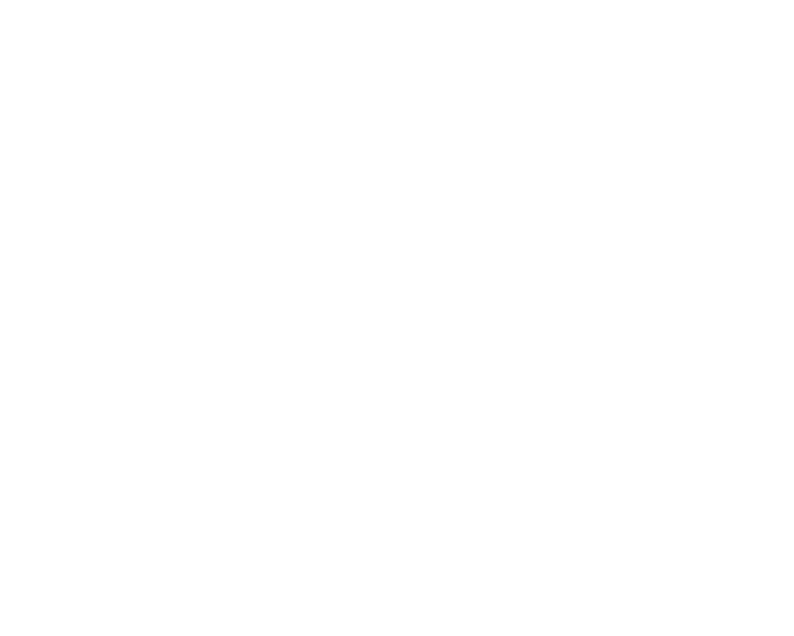

In [63]:
dtree = plt.figure(figsize=(10, 8))
plot_tree(Dectree, feature_names=X.columns, filled=True, rounded=True, precision=4)
dtree.savefig('tree.pdf')
plt.show()

AttributeError: 'Pipeline' object has no attribute 'tree_'

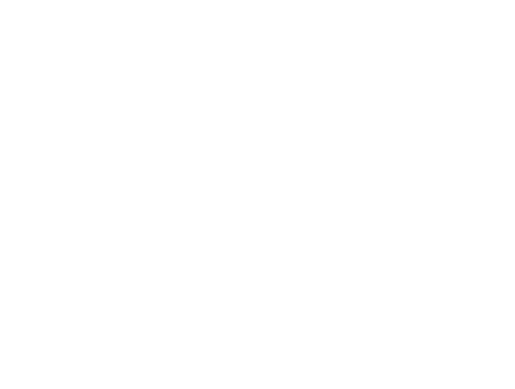

In [59]:
Tree = tree.plot_tree(Dectree)